In [95]:
import numpy as np
import matplotlib.pyplot as plt
from triqs.gf import *
from triqs.gf.descriptors import Function
from triqs.plot.mpl_interface import oplot
import h5
%config InlineBackend.figure_format = 'retina'

(0.0, 3.0)

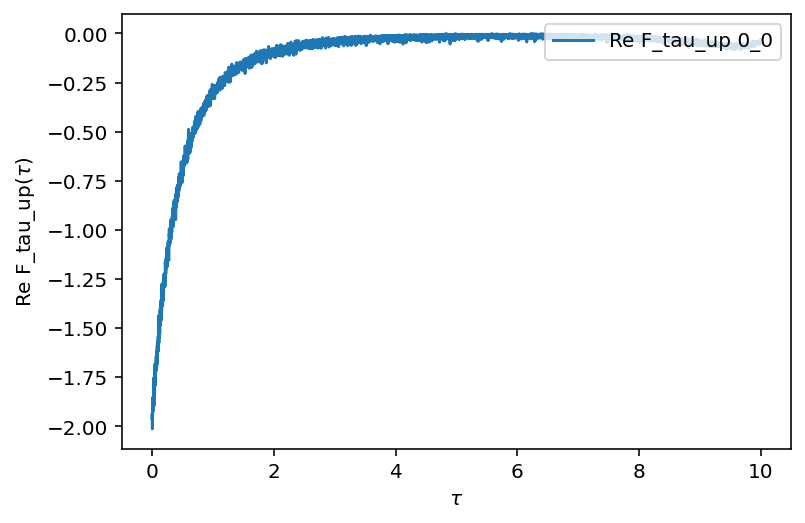

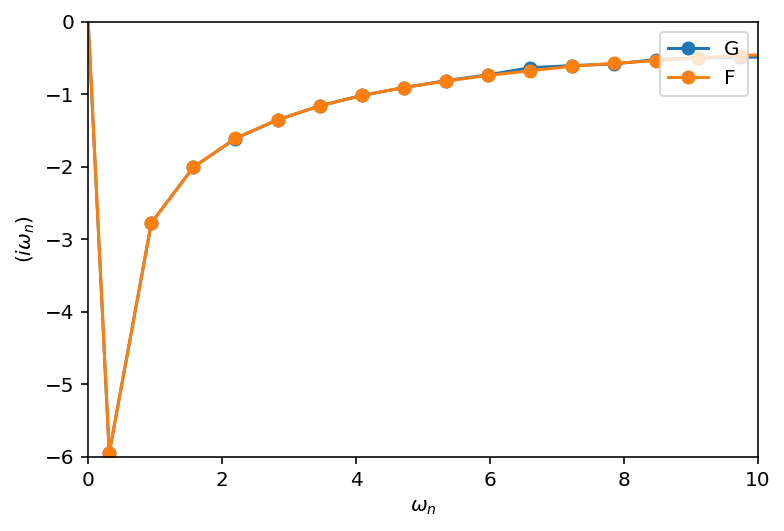

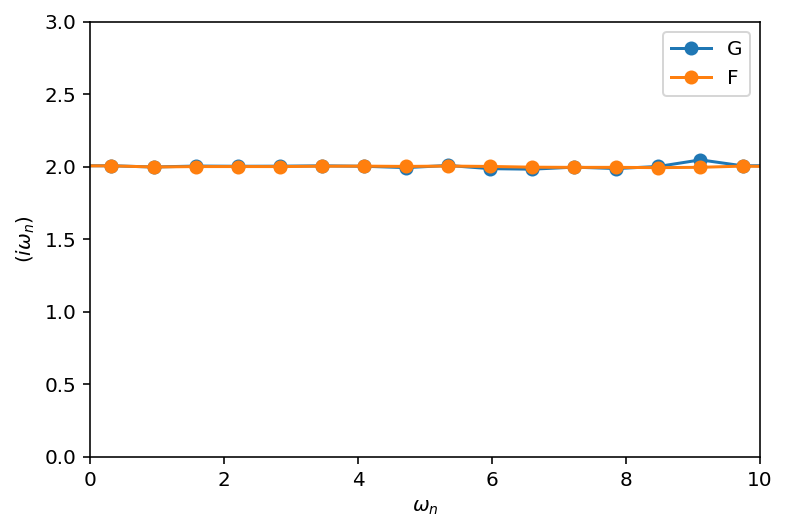

In [96]:
beta = 10
n_tau = 2051
n_iw = 1025

with h5.HDFArchive("test_J_new.h5", 'r') as Af:
    G_tau = Af["G_tau"]
    F_tau = Af["F_tau"]
    Knew = Af["Kprime_tau"]

with h5.HDFArchive("test_J_old.h5", 'r') as Af:
    Kold = Af["Kprime_tau"]

fig, ax = plt.subplots()
oplot(F_tau['up'].real)

with h5.HDFArchive("/mnt/home/nkavokine/ctseg_J/test/python/ctint.ref.h5", 'r') as Af:
    G0_iw = Af["dmft_loop/i_001/S/G0_iw/up"]

G_iw = GfImFreq(indices=[0], beta=beta, n_points=n_iw)
F_iw = GfImFreq(indices=[0], beta=beta, n_points=n_iw)
G_iw << Fourier((G_tau['up'] + G_tau['down'])/2)
F_iw << Fourier((F_tau['up'] + F_tau['down'])/2)
SigmaF =  F_iw * inverse(G_iw)
SigmaG = inverse(G0_iw) - inverse(G_iw)

fig, ax = plt.subplots()
oplot(SigmaG.imag,'o-',label = 'G')
oplot(SigmaF.imag,'o-',label = 'F')
ax.set_xlim([0,10])
ax.set_ylim([-6,0])

fig, ax = plt.subplots()
oplot(SigmaG.real,'o-',label = 'G')
oplot(SigmaF.real,'o-',label = 'F')
ax.set_xlim([0,10])
ax.set_ylim([0,3])


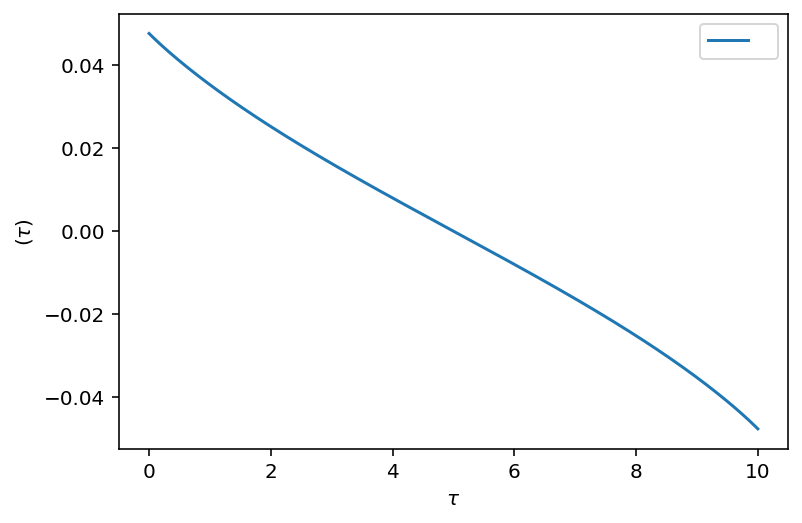

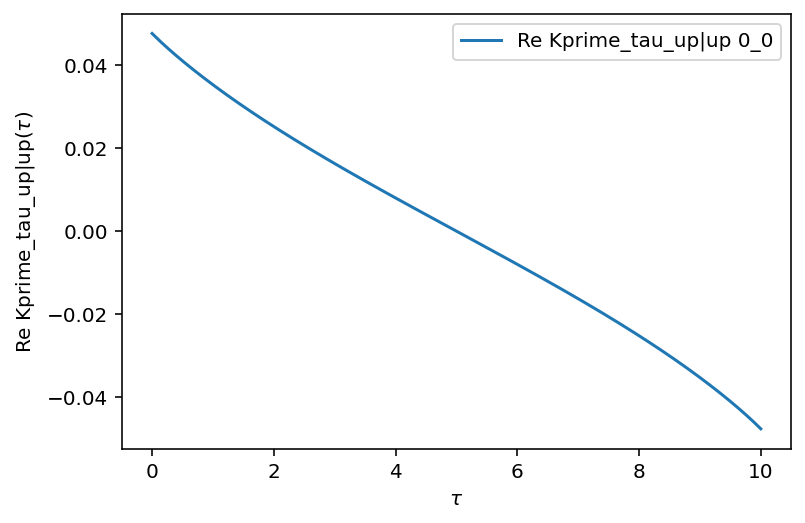

In [97]:
fig, ax = plt.subplots()
oplot(Knew[0,0].real)
fig, ax = plt.subplots()
oplot(Kold['up|up'].real)